# Latar Belakang
Transjakarta merupakan sebuah sistem transportasi Bus Rapid Transit (BRT) pertama di Asia Tenggara dan Selatan yang beroperasi sejak tahun 2004 di Jakarta, Indonesia. Transjakarta merupakan sistem BRT dengan jalur lintasan terpanjang di dunia (230,9 km), serta memiliki 252 halte yang tersebar dalam 14 koridor (rute utama), yang pada awalnya beroperasi dari pukul 05.00–22.00 WIB, dan kini beroperasi selama 24 jam di seluruh koridornya. 

Sebagai moda transportasi massal pendukung aktivitas ibukota yang padat, maka perlu upaya peningkatan efisiensi dan kenyamanan dalam pelayanan untuk penumpang. Sehingga dibutuhkan rekomendasi strategi guna meningkatkan kinerja operasional dan optimalisasi revenue dengan melakukan analisis terhadap dfset transaksi bulan April 2023.

## Pernyataan Masalah


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import warnings


import statsmodels.api as sm

warnings.filterwarnings('ignore')

# **CAPSTONE PROJECT MODULE 2 - TRANSJAKARTA** #

In [2]:
# #Menampilkan semua kolom pada dfframe

pd.set_option('display.max_columns', None)

In [3]:
# Menampilkan file csv

df = pd.read_csv('transjakarta.csv')
df.head(10)

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0
5,DDES630K2F80KC,2251412124634980,dki,Tirta Siregar,F,1993,1T,Cibubur - Balai Kota,0.0,B00127P,Benhil 3,-6.216010,106.81632,3,2023-04-03 05:08:01,B00694P,Grand Sahid,-6.210975,106.82059,6.0,2023-04-03 05:52:25,20000.0
6,HEMW326B9N91TV,213155822653833,emoney,"R. Devi Hariyah, S.T.",M,1974,JAK.18,Kalibata - Kuningan,0.0,B00243P,Cervino Village,-6.224355,106.85165,25,2023-04-03 06:58:21,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,XTKE052E5E87LN,3587341902618993,dki,Darmanto Rajasa,F,1991,NaN,NaN,1.0,B03416P,SDN Pondok Labu 11,-6.313269,106.80221,2,2023-04-03 06:44:24,B00899P,Jln. Baros,-6.311046,106.78400,12.0,2023-04-03 07:11:43,0.0
8,OIHS248V7S72EB,6510013988638519,dki,"Cagak Maheswara, S.Sos",F,1992,B14,Bekasi Barat - Kuningan,1.0,B00795P,Imperium,-6.210363,106.83059,1,2023-04-03 06:01:44,B01853P,Kayuringin 2,-6.245948,106.99247,16.0,2023-04-03 06:51:12,20000.0
9,ERXO372B2H63RB,3580401035990896,dki,"T. Dadap Pradana, M.Ak",M,2004,1Q,Rempoa - Blok M,0.0,B05781P,TPU Bungur,-6.247208,106.77889,15,2023-04-03 05:57:47,B06578P,Blok M Jalur 3,-6.243426,106.80188,24.0,2023-04-03 06:51:12,3500.0


In [4]:
# Mengetahui jumlah baris dan kolom
print(f'dataframe Transjakarta memiliki {df.shape[0]} baris dan {df.shape[1]} kolom')

dataframe Transjakarta memiliki 37900 baris dan 22 kolom


In [5]:
# Menampilkan jumlah baris yang bukan null-values dan tipe df per kolom.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37900 entries, 0 to 37899
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   transID           37900 non-null  object 
 1   payCardID         37900 non-null  int64  
 2   payCardBank       37900 non-null  object 
 3   payCardName       37900 non-null  object 
 4   payCardSex        37900 non-null  object 
 5   payCardBirthDate  37900 non-null  int64  
 6   corridorID        36643 non-null  object 
 7   corridorName      35970 non-null  object 
 8   direction         37900 non-null  float64
 9   tapInStops        36687 non-null  object 
 10  tapInStopsName    37900 non-null  object 
 11  tapInStopsLat     37900 non-null  float64
 12  tapInStopsLon     37900 non-null  float64
 13  stopStartSeq      37900 non-null  int64  
 14  tapInTime         37900 non-null  object 
 15  tapOutStops       35611 non-null  object 
 16  tapOutStopsName   36556 non-null  object

## **INFORMASI DATASET** ##

1. transID			    : Kode unik setiap tapping transaksi
2. payCardID	        : Nomor tertera pada kartu yang digunakan penumpang untuk melakukan tapping transaksi. Kartu ini wajib digunakan setiap penumpang saat tap-in dan tap-out
3. payCardBank			: Nama bank sebagai provider kartu transaksi
4. payCardName		    : Nama pemilik kartu transaksi
5. payCardSex			: Jenis kelamin pemilik kartu transaksi
6. payCardBirthDate		: Tahun kelahiran pemilik kartu
7. corridorID			: Kode rute
8. corrdiorName		    : Nama rute
9. Direction			: Kode arah rute. 0 for go and 1 for back
10. tapInStops			: Kode halte yang digunakan penumpang untuk melakukan transaksi tap-in
11. tapInStopsName		: Nama halte yang digunakan penumpang untuk melakukan transaksi tap-in
12. tapInStopsLat		: Koordinat sumbu y halte yang digunakan penumpang untuk melakukan transaksi tap-in
13. tapInStopsLon		: Koordinat sumbu x halte yang digunakan penumpang untuk melakukan transaksi tap-in
14. stopStartSeq		: Urutan mulai halte
15. tapInTime			: Date and time penumpang melakukan tap-in
16. tapOutStops		    : Kode halte yang digunakan penumpang untuk melakukan transaksi tap-out
17. tapOutStopsName		: Nama halte yang digunakan penumpang untuk melakukan transaksi tap-out
18. tapOutStopsLat		: Koordinat sumbu y halte yang digunakan penumpang untuk melakukan transaksi tap-out
19. tapOutStopsLon		: Koordinat sumbu x halte yang digunakan penumpang untuk melakukan transaksi tap-out
20. stopEndSeq			: Urutan berhenti halte
21. tapOutTime			: Date and time penumpang melakukan tap-out
22. payAmount			: Nilai transaksi untuk setiap tapping. Ada yang berbayar dan gratis.

In [6]:
display(df.describe(),df.describe(include='object'))

,payCardID,payCardBirthDate,direction,tapInStopsLat,tapInStopsLon,stopStartSeq,tapOutStopsLat,tapOutStopsLon,stopEndSeq,payAmount
count,3.790000e+04,37900.000000,37900.000000,37900.000000,37900.000000,37900.000000,36556.000000,36556.000000,36556.000000,36893.000000
mean,4.250060e+17,1990.089314,0.500633,-6.214838,106.841554,13.572480,-6.214651,106.841233,21.219909,2699.712683
std,1.321699e+18,13.051482,0.500006,0.057911,0.060369,12.237623,0.059022,0.060999,13.800689,4212.225592
min,6.040368e+10,1946.000000,0.000000,-6.394973,106.614730,0.000000,-6.394973,106.614730,1.000000,0.000000
25%,1.800442e+14,1982.000000,0.000000,-6.245863,106.803470,4.000000,-6.247225,106.801750,11.000000,0.000000
50%,3.507947e+15,1990.000000,1.000000,-6.214587,106.834830,10.000000,-6.214718,106.834580,18.000000,3500.000000
75%,4.699023e+15,2001.000000,1.000000,-6.175528,106.882270,19.000000,-6.174736,106.883030,29.000000,3500.000000
max,4.997694e+18,2012.000000,1.000000,-6.089429,107.023950,68.000000,-6.091746,107.023660,77.000000,20000.000000


,transID,payCardBank,payCardName,payCardSex,corridorID,corridorName,tapInStops,tapInStopsName,tapInTime,tapOutStops,tapOutStopsName,tapOutTime
count,37900,37900,37900,37900,36643,35970,36687,37900,37900,35611,36556,36556
unique,37900,6,1993,2,221,216,2570,2602,37079,2230,2248,35908
top,EIIW227B8L34VB,dki,Fathonah Saefullah,F,1T,Cibubur - Balai Kota,P00170,Penjaringan,2023-04-25 06:23:00,P00016,BKN,2023-04-10 19:10:15
freq,1,18743,80,20157,400,391,236,243,3,306,316,3


In [7]:
pd.set_option('display.max_colwidth', None)

# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,transID,37900,"[EIIW227B8L34VB, LGXO740D2N47GZ, DJWR385V2U57TO, JTUZ800U7C86EH, VMLO535V7F95NJ, DDES630K2F80KC, HEMW326B9N91TV, XTKE052E5E87LN, OIHS248V7S72EB, ERXO372B2H63RB, CLWK627W2M22WO, IIEK980X1O23NZ, OPLW560U3S06UG, XESX233R4U46DN, LZFD368Q3E81HJ, KLUN542I2F21PI, XDMP644Z5Y29DB, CUPO258C0D42PY, SBPQ144H4S45RA, ZYRL615G4C05RD, MEFW094B7A84RS, ZJVI960B9I42DA, RJPK085I1K65HR, TFIO518N2X54UT, SYLN486U0E02TA, BECP746A8C28NV, KYNP204W3G29VA, MSFD430X8W13TO, MKND874X1D96HF, LFYJ535S2I30DP, TCKQ601Q5O01BC, KQIA358G2N38CX, RANO576G1J87EO, NZCE828E4J23AW, OFPJ170M5O75AP, LKXU174O1E59EP, AXTN077R7Z77JM, WQXL397G5U61OY, RLLZ887W3V14WZ, JJEK861K6E37KF, UANX737M9L25GI, VUWZ891M7I57EB, CXLW459Z3A28RD, AQPU510X2X44PT, BRUT293K1O98GA, MMEX885R3T18QL, UNFK619O2R74DX, FTGY161E2O14MG, ELVU605Z3W26IF, KPDA909R2T72GD, GIHF067H1Y81IV, IXJW013G5W79VX, PKAM574R5S22UG, IQBJ843C4G34DE, SRIX686S0S08SW, MLTY652D7F29HW, NICD824U6H93DE, YEOK544W1J67OX, OPNL705D9K64FN, KHKM512K0T88LD, RHUT145C1U25ZY, TWAK265Z0M88QR, JQIF022K9P74RM, MQCN972F9X71NY, KINJ335N6L86YT, TDIY341Y5S79UU, TFRA396G6W78PD, GXOP506G9B61EP, XESL868N6A66XN, IVHH403J9T51JH, OTGH855B8A29BP, YJMS457L2O20JF, NNAE999Q4V92XM, UCMI767D7M79GS, ZHFN555D9L05LU, WHTZ386I9S44YF, VHUC320U1S58CB, DBWI728C0M55ND, HHCJ093F0W41XK, JUNS207R4F95UA, LFIW578V8Y12XO, GYVC538M6B25WO, QRFR658M6P01AH, TKQW976R2D32RY, PCGM443G2W62OB, PEGV120E5W96OH, BUQT197K3D65PN, UNSO267V8F26WP, RHCN069U6G42WD, QMHC825R0K38KM, WGRY331M3O87VE, TKRV681O2S46RW, ELFD362R2U94NT, YYXK265F5N59SE, ZGJG301G9Z71AR, KNSE319Q1P35CC, RMJF585F2W51BQ, KFYK655N1H73XS, WTBE175B2A58NC, SVRH922T8G79FY, ...]"
1,payCardID,2000,"[180062659848800, 4885331907664776, 4996225095064169, 639099174703, 570928206772, 2251412124634980, 213155822653833, 3587341902618993, 6510013988638519, 3580401035990896, 5541851157087967, 347204308990092, 3536759468239783, 6575130739600630, 4056836188316, 4532407180860336, 4556326832434362836, 4969284110642, 502034641014, 5430018591726410, 378872365541693, 343851798729291, 676293109036, 213191293100137, 2295833910329055, 4968156435384914, 676367323901, 4384653483539395, 213155309116759, 4682220924642, 3589380857722689, 4394677357168120, 4905734029265594, 379334845079777, 346910704516122, 2247096843683316, 675990206087, 639040388584, 4947438345710982, 3539535695881465, 574726750023, 344303671677311, 3544931989278653, 4017802962833960, 5465310774429054, 347394043585982, 4723250872219869, 3545499820365948, 2718070346782735, 342531623551844, 349944373495091, 4428582927102421723, 566171543168, 213121690546749, 3527853482331808, 5542490449138301, 4380875529452127, 4172238784006231, 340065298083181, 4268640600849949, 4290559479079, 213155263532652, 4294484188649274, 180057903365395, 3551174827324245, 340858239719917, 3569562588766630, 180016859215889, 373945281501952, 5134532253940704, 3549158005951908, 379764016867073, 4189640459822695962, 4766007569419196, 3576239635494729, 587887634588, 567286069354, 4097122165824, 378851219912235, 180022972730457, 2237440645700724, 6011162006507240, 4730280883020443501, 3505707886664931, 4450403105752326, 4074114259011835374, 4000041838802, 4112330548313, 30583455954585, 3537543297101185, 2720484776954605, 3570422408611549, 2291402671071407, 676172975739, 180020791350481, 502072062834, 30385017224303, 6590854673757012, 4963710913075879668, 213104805015669, ...]"
2,payCardBank,6,"[emoney, dki, flazz, online, brizzi, bni]"
3,payCardName,1993,"[Bajragin Usada, Gandi Widodo, Emong Wastuti, Surya Wacana, Embuh Mardhiyah, Tirta Siregar, R. Devi Hariyah, S.T., Darmanto Rajasa, Cagak Maheswara, S.Sos, T. Dadap Pradana, M.Ak, Oskar Widiastuti, S.Farm, R.M. Labuh Laksmiwati, Shakila Maryadi, Danuja Usada, Nadine Utami, H. Lutfan Nurdiyanti, Sari Nababan, Hj. Ophelia Haryanti, S.Sos, Adikara Kurniawan, S.Sos, Karna Waskita, Aslijan Irawan, Garang Utama, Fathonah Saefullah, Darman Purwanti, Taufik Farida, Martana Suartini, Eluh Nugroho, Cut Hana Maulana,

1. Terdapat 3 tarif yang dikenakan kepada para pengguna jasa transportasi transjakarta. Rp3.500 , Rp20.000 , dan bebas biaya (Rp0). 
2. Kolom stopStartSeq dan stopEndSeq merupakan halte nomor ke x dan nomor ke y dalam suatu koridor, artinya kolom stopEndSeq dan stopStartSeq dapat dikurangkan untuk mencari total jarak tempuh (satuan per stop).
3. Beberapa kolom seperti `corridorID`, `corridorName`, `tapInStops`, `tapOutStops`, `tapOutStopsName`, `tapOutStopsLat`, `tapOutStopsLon`, `stopEndSeq`, `tapOutTime`, dan `payAmount` memiliki missing values.
4. Kolom `transID` berisikan data unik per transaksi.
5. 

## **1. Data Cleaning** ##

In [8]:
# Mengecek data duplikat
df.duplicated().sum()

0

Tidak ditemukan data duplikat

In [9]:
# Mengecek jumlah NULL values dalam tiap kolom
df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops          1213
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops         2289
tapOutStopsName     1344
tapOutStopsLat      1344
tapOutStopsLon      1344
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [10]:
nullPct = pd.DataFrame(df.isna().sum()/df.shape[0]*100, columns = ['NULL(%)'])
nullPct.loc[nullPct['NULL(%)'] != 0]

,NULL(%)
corridorID,3.316623
corridorName,5.092348
tapInStops,3.200528
tapOutStops,6.039578
tapOutStopsName,3.546174
tapOutStopsLat,3.546174
tapOutStopsLon,3.546174
stopEndSeq,3.546174
tapOutTime,3.546174
payAmount,2.656992


Semua df yang memiliki value NULL besarnya dibawah 10% pada setiap kolomnya. Maka sebenarnya kita dapat menghapus semua value NULL sekaligus, namun dalam kasus ini, kita menghapus df yang memiliki value NULL pada beberapa kolom krusial saja yang tidak dapat diisi oleh nilai median (untuk tipe df numeric) atau UNKNOWN(untuk tipe df categoric).

In [11]:
# Mengisi numeric values dengan median dan categorical menggunakan unkown

df['tapInStops'].fillna('Unknown', inplace=True)
df['tapOutStops'].fillna('Unknown', inplace=True)
df['tapOutStopsName'].fillna('Unknown', inplace=True)
df['tapOutStopsLat'].fillna(df['tapOutStopsLat'].median(), inplace=True)
df['tapOutStopsLon'].fillna(df['tapOutStopsLon'].median(), inplace=True)

# Mengubah df types pada kolom tapInTime & tapOutTime
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

df.isna().sum()

transID                0
payCardID              0
payCardBank            0
payCardName            0
payCardSex             0
payCardBirthDate       0
corridorID          1257
corridorName        1930
direction              0
tapInStops             0
tapInStopsName         0
tapInStopsLat          0
tapInStopsLon          0
stopStartSeq           0
tapInTime              0
tapOutStops            0
tapOutStopsName        0
tapOutStopsLat         0
tapOutStopsLon         0
stopEndSeq          1344
tapOutTime          1344
payAmount           1007
dtype: int64

In [12]:
df=df.dropna()

In [13]:
# Save the cleaned data to a new CSV file
cleaned_file_path = 'Transjakarta_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)


Mengisi NULL values numeric dengan median dan values categorical menggunakan 'Unknown'. Hal ini dilakukan agar tidak terlalu banyak df yang terhapus.

Drop kolom sisanya yang memiliki NULL values (corridorID, corridorName, tapOutTime & payAmount) agar tidak mempengaruhi analisa df.
1. corridorID adalah kolom dengan tipe category, yang digunakan untuk menunjukan nomor/atau kode corridor atau rute. df pada kolom ini berkorelasi dengan kolom corridorName, yang nantinya akan digunakan untuk menganalisa koridor dengan traffic terbanyak.
2. corridorName adalah kolom dengan tipe category, yang digunakan untuk menganalisa koridor dengan traffic terbanyak. Kolom dengan NULL values dihapus karena, apabila diisi dengan value `UNKNOWN` atau `other corridors`, tidak akan memberikan hasil/outcome yang signifikan.
3. payAmount dengan null values dihapus karena apabila diisi dengan median(Rp3500) dan rute tersebut termasuk rute yang bersubsidi(Rp0) maka hasil analisis tidak akan akurat.

In [14]:
# Extracting the hour value from both tapInTime and tapOutTime Columns
df['tapInHour'] = df['tapInTime'].dt.hour
df['tapOutHour'] = df['tapOutTime'].dt.hour

#Extracting the dates of each transaction from the column tapInTime
df['tapInDay'] = df['tapInTime'].dt.day

#Adding Column `Age` into the dataset
df['Age'] = 2023 - df['payCardBirthDate']

# Define age groups
AGEbins = [0, 18, 25, 40, 60, 100]
agelabels = ['<18', '18-25', '26-40', '41-60', '>60']
df['AgeGroup'] = pd.cut(df['Age'], bins=AGEbins, labels=agelabels, right=False)

# Adding Column `Distance` to the dataset
df['distance'] = df['stopEndSeq'] - df['stopStartSeq']

# Define distance groups
DISTbins = [0, 10, 20, 30, 40, 50, 100]
distlabels = ['<10', '10-20', '21-30', '31-40', '41-50', '>50']
df['distGroup'] = pd.cut(df['distance'], bins=DISTbins, labels=distlabels, right=False)

df

,transID,payCardID,payCardBank,payCardName,payCardSex,payCardBirthDate,corridorID,corridorName,direction,tapInStops,tapInStopsName,tapInStopsLat,tapInStopsLon,stopStartSeq,tapInTime,tapOutStops,tapOutStopsName,tapOutStopsLat,tapOutStopsLon,stopEndSeq,tapOutTime,payAmount,tapInHour,tapOutHour,tapInDay,Age,AgeGroup,distance,distGroup
0,EIIW227B8L34VB,180062659848800,emoney,Bajragin Usada,M,2008,5,Matraman Baru - Ancol,1.0,P00142,Pal Putih,-6.184631,106.84402,7,2023-04-03 05:21:44,P00253,Tegalan,-6.203101,106.85715,12.0,2023-04-03 06:00:53,3500.0,5,6,3,15,<18,5.0,<10
1,LGXO740D2N47GZ,4885331907664776,dki,Gandi Widodo,F,1997,6C,Stasiun Tebet - Karet via Patra Kuningan,0.0,B01963P,Kemenkes 2,-6.228700,106.83302,13,2023-04-03 05:42:44,B03307P,Sampoerna Strategic,-6.217152,106.81892,21.0,2023-04-03 06:40:01,3500.0,5,6,3,26,26-40,8.0,<10
2,DJWR385V2U57TO,4996225095064169,dki,Emong Wastuti,F,1992,R1A,Pantai Maju - Kota,0.0,B00499P,Gg. Kunir II,-6.133132,106.81435,38,2023-04-03 05:59:06,B04962P,Simpang Kunir Kemukus,-6.133731,106.81475,39.0,2023-04-03 06:50:55,3500.0,5,6,3,31,26-40,1.0,<10
3,JTUZ800U7C86EH,639099174703,flazz,Surya Wacana,F,1978,11D,Pulo Gebang - Pulo Gadung 2 via PIK,0.0,B05587P,Taman Elok 1,-6.195743,106.93526,23,2023-04-03 05:44:51,B03090P,Raya Penggilingan,-6.183068,106.93194,29.0,2023-04-03 06:28:16,3500.0,5,6,3,45,41-60,6.0,<10
4,VMLO535V7F95NJ,570928206772,flazz,Embuh Mardhiyah,M,1982,12,Tanjung Priok - Pluit,0.0,P00239,Sunter Boulevard Barat,-6.149650,106.88900,5,2023-04-03 06:17:35,P00098,Kali Besar Barat,-6.135355,106.81143,15.0,2023-04-03 06:57:03,3500.0,6,6,3,41,41-60,10.0,10-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37895,ZWEC949B8Q87QG,4685818286724028395,brizzi,Kamila Mahendra,F,2004,6B,Ragunan - MH Thamrin via Semanggi,1.0,P00261,Tosari,-6.196892,106.82309,2,2023-04-21 18:18:37,P00228,SMK 57,-6.290967,106.82365,13.0,2023-04-21 19:55:49,3500.0,18,19,21,19,18-25,11.0,10-20
37896,YHHK837P6Y95GN,6502902290603767,dki,Titi Siregar,M,1974,9N,Pinang Ranti - Pramuka,1.0,P00064,Garuda Taman Mini,-6.290154,106.88116,1,2023-04-18 21:52:31,P00179,Pinang Ranti,-6.291075,106.88634,2.0,2023-04-18 22:28:22,3500.0,21,22,18,49,41-60,1.0,<10
37897,YXPP627N4G95HO,213159426675861,emoney,drg. Zahra Nashiruddin,F,1976,1T,Cibubur - Balai Kota,1.0,B02873P,Plaza Sentral,-6.216247,106.81676,12,2023-04-04 10:29:47,B00226P,Buperta Cibubur,-6.370321,106.89628,14.0,2023-04-04 13:27:25,20000.0,10,13,4,47,41-60,2.0,<10
37898,RGVK175U2U98UV,377840859133591,emoney,Ana Agustina,M,1976,JAK.13,Tanah Abang - Jembatan Lima,1.0,B02505P,Museum Textile,-6.188656,106.80954,33,2023-04-15 19:59:26,B01787P,JPO Blok G,-6.188861,106.81135,34.0,2023-04-15 20:27:50,0.0,19,20,15,47,41-60,1.0,<10


In [15]:
df.isna().sum()

transID             0
payCardID           0
payCardBank         0
payCardName         0
payCardSex          0
payCardBirthDate    0
corridorID          0
corridorName        0
direction           0
tapInStops          0
tapInStopsName      0
tapInStopsLat       0
tapInStopsLon       0
stopStartSeq        0
tapInTime           0
tapOutStops         0
tapOutStopsName     0
tapOutStopsLat      0
tapOutStopsLon      0
stopEndSeq          0
tapOutTime          0
payAmount           0
tapInHour           0
tapOutHour          0
tapInDay            0
Age                 0
AgeGroup            0
distance            0
distGroup           0
dtype: int64

In [16]:
# Mengetahui jumlah baris dan kolom setelah data cleaning
print(f'Setelah dilakukan data cleaning dan penambahan variabel, dataframe Transjakarta memiliki {df.shape[0]} baris dan {df.shape[1]} kolom')

Setelah dilakukan data cleaning dan penambahan variabel, dataframe Transjakarta memiliki 33657 baris dan 29 kolom


In [17]:
df.to_csv('transjakarta_cleaned.csv', index=False)

## **2. Data Analysis** ##

### **Objektif**

1. Mengoptimalkan keuntungan transjakarta.
2. Memberikan rekomendasi strategi dalam mengoptimalkan rute.

## **Mencari Data Koridor Teramai/Tersibuk Berdasarkan Total Transaksi** ##

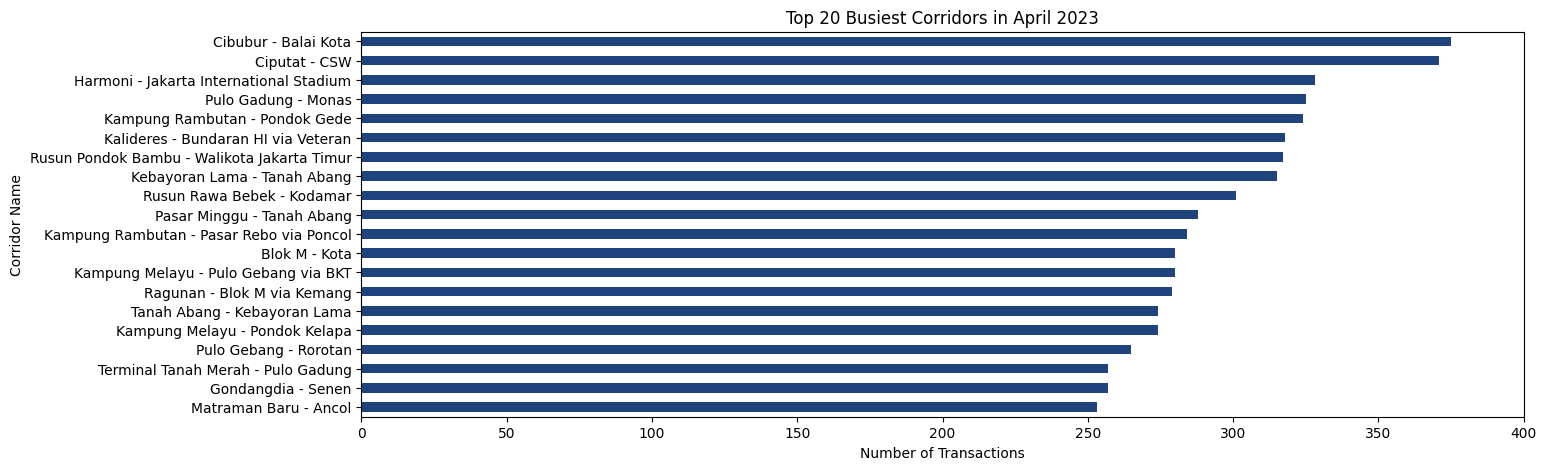

corridorName
Cibubur - Balai Kota                           375
Ciputat - CSW                                  371
Harmoni - Jakarta International Stadium        328
Pulo Gadung - Monas                            325
Kampung Rambutan - Pondok Gede                 324
Kalideres - Bundaran HI via Veteran            318
Rusun Pondok Bambu - Walikota Jakarta Timur    317
Kebayoran Lama - Tanah Abang                   315
Rusun Rawa Bebek - Kodamar                     301
Pasar Minggu - Tanah Abang                     288
Kampung Rambutan - Pasar Rebo via Poncol       284
Blok M - Kota                                  280
Kampung Melayu - Pulo Gebang via BKT           280
Ragunan - Blok M via Kemang                    279
Tanah Abang - Kebayoran Lama                   274
Kampung Melayu - Pondok Kelapa                 274
Pulo Gebang - Rorotan                          265
Terminal Tanah Merah - Pulo Gadung             257
Gondangdia - Senen                             257
Matraman Baru - An

In [18]:
# Menghitung 10 koridor teramai
corridor_counts = df['corridorName'].value_counts().head(20)

# Create a horizontal bar graph for the top 10 busiest corridors
plt.figure(figsize=(15, 5))
bars = corridor_counts.plot(kind='barh', color='#1f437d')
plt.xlabel('Number of Transactions')
plt.ylabel('Corridor Name')
plt.xticks(np.arange(0,401,50))
plt.title('Top 20 Busiest Corridors in April 2023')
plt.gca().invert_yaxis()  # Invert y-axis to have the busiest corridor at the top
plt.show()

print(corridor_counts)


Grafik tersebut menunjukkan 20 koridor teramai pada bulan April 2023 dengan top 3 corridors yaitu `Cibubur - balai Kota`, `Ciputat - CSW`,  `Harmoni - Jakarta International Stadium`.

**RECOMMENDATION**\
Transjakarta dapat memanfaatkan data ini untuk AdSpace (Space Iklan). Memaksimalkan harga AdSpace untuk daerah - daerah teramai. Bahkan, karena traffic yang tinggi, corridor - corridor yang gratis pun dapat berpotensi untuk menghasilkan profit bagi perusahaan dengan menerapkan strategi ini.

count     20.000000
mean     298.250000
std       35.208963
min      253.000000
25%      274.000000
50%      286.000000
75%      319.500000
max      375.000000
Name: count, dtype: float64


Text(0.5, 1.0, 'Top 20 Busiest Corridors in April 2023')

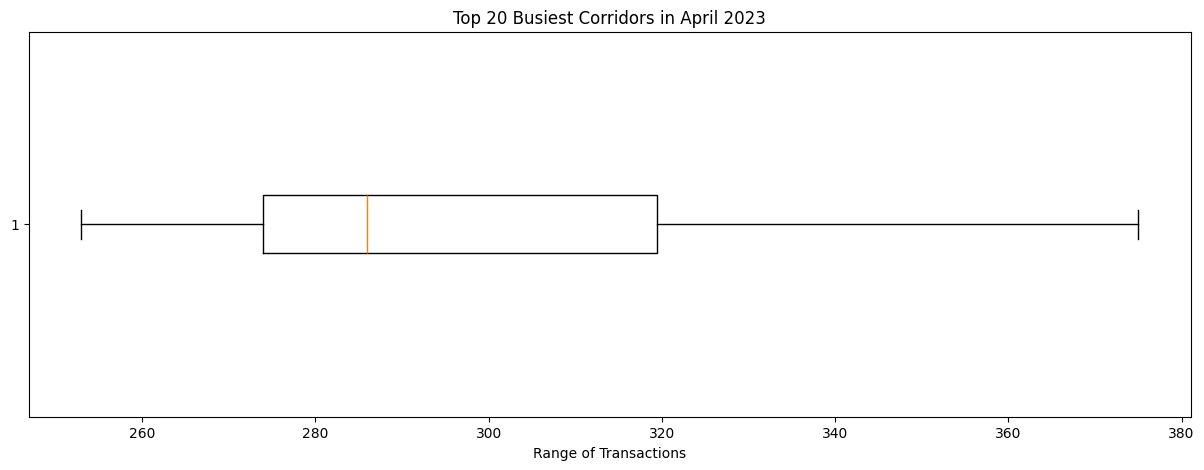

In [19]:
print(corridor_counts.describe())

plt.figure(figsize=(15,5))
plt.boxplot(x=corridor_counts, vert=False)
plt.xlabel('Range of Transactions')
plt.title('Top 20 Busiest Corridors in April 2023')

Dari 20 *Corridor* teramai, mayoritas corridor tersebut memiliki sekitar 270 - 320 transaksi per bulannya. Ada juga yang transaksi nya mencapai 370+ transaksi. Tidak ditemukan adanya outliers dari 20 data tersebut.

**RECOMMENDATION**\
Menggunakan impressions per corridor sebanyak 298 (angka mean/rata - rata jumlah transaksi dari 20 corridor tersibuk).

## **Menganalisa Fluktuasi Transaksi dalam 1 Bulan** ##

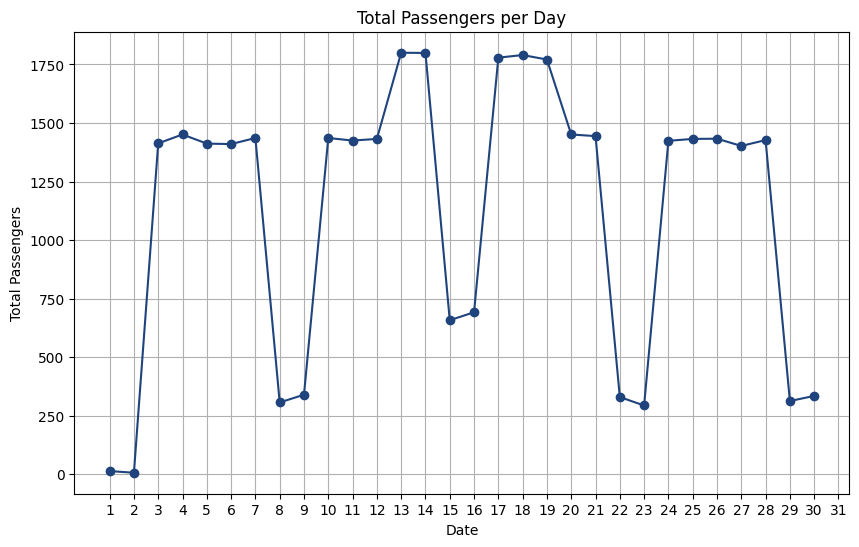

In [20]:
#cari peak time, di group by kolom hour yang kita baru buat untuk cari padat penumpang/jam
dfDays = df.groupby('tapInDay').size().rename('totalpenumpang')

#Plot grafik jumlah penumpang pada jam sibuk dengan grafik batang
plt.figure(figsize=(10, 6))
plt.plot(dfDays.index, dfDays.values, marker='o', color='#1f437d')
plt.xlabel('Date')
plt.ylabel('Total Passengers')
plt.xticks(np.arange(1,32))
plt.title('Total Passengers per Day')
plt.grid(True)
plt.show()

In [33]:
dfDays_weekends = dfDays.loc[[1,2,8,9,15,16,22,23,29,30]]
dfDays_weekdays = dfDays.drop([1,2,8,9,15,16,22,23,29,30], axis=0)

print(f'Total transaksi selama Bulan April 2023 adalah sebanyak {dfDays.sum()}.')
print(f'Total transaksi pada hari kerja (weekdays) adalah sebanyak {dfDays_weekdays.sum()}.')
print(f'Sedangkan, total transaksi pada hari Sabtu dan Minggu (weekends) sebanyak {dfDays_weekends.sum()} dimana angka tersebut hanya {round(dfDays_weekends.sum()/dfDays.sum()*100,2)}% dari total transaksi selama Bulan April')

Total transaksi selama Bulan April 2023 adalah sebanyak 33657.
Total transaksi pada hari kerja (weekdays) adalah sebanyak 30367.
Sedangkan, total transaksi pada hari Sabtu dan Minggu (weekends) sebanyak 3290 dimana angka tersebut hanya 9.78% dari total transaksi selama Bulan April


Fluktuasi kesibukan mobilisasi masyarakat yang menggunakan jasa transportasi Transjakarta dapat dikatakan tinggi pada hari kerja (weekdays) dan cenderung rendah pada hari Sabtu dan Minggu (weekends). Dari keseluruhan transaksi padal Bulan April 2023, 90.22% total transaksi menggunakan jasa Transjakarta pada hari - hari kerja (weekdays) dan hanya 9.78% dari total transaksi selama 1 bulan menggunakan Transjakarta sebagai moda transportasi pada hari Sabtu dan Minggu.

**RECOMMENDATION**\
Sehubungan dengan kontrasnya pengguna moda transportasi Transjakarta pada hari Sabtu dan Minggu, Sangat mungkin apabila Transjakarta mengoperasikan bus jauh lebih sedikit pada hari - hari tersebut. Dengan kata lain, Frekuensi bus tiap stop dapat diturunkan, hal ini guna efisiensi biaya.

## **Menganalisa Jam Sibuk Transjakarta Dalam 1 Hari** ##

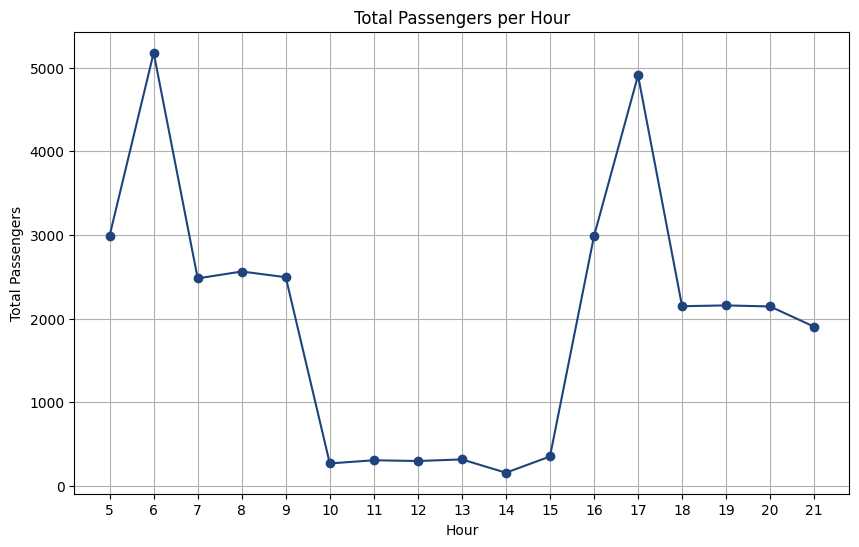

In [22]:
#cari peak time, di group by kolom hour yang kita baru buat untuk cari padat penumpang/jam
dfp = df.groupby('tapInHour').size().rename('totalpenumpang')

#Plot grafik jumlah penumpang pada jam sibuk dengan grafik batang
plt.figure(figsize=(10, 6))
plt.plot(dfp.index, dfp.values, marker='o', color='#1f437d')
plt.xlabel('Hour')
plt.ylabel('Total Passengers')
plt.xticks(np.arange(5,22))
plt.title('Total Passengers per Hour')
plt.grid(True)
plt.show()

Jam - jam sibuk di dalam 1 hari adalah mulai jam 6 - 7 pagi lalu aktivitas kesibukan bus transjakarta menurun pada jam 8 - 9. Traffic pengguna Transjakarta menjadi dibawah rata - rata per hari pada jam 10 hingga sekitaar jam 3 sore.Kemudian kembali naik pada jam 4 dan mencapai puncak kesibukan kedua pada jam 5 sore. Peak Hours atau puncak kesibuka berada pada jam 6 pagi dan jam 5 sore.

**RECOMMENDATION**\
Dengan data ini, Transjakarta dapat mempertimbangkan untuk memfokuskan frekuensi bus pada jam - jam sibuk dan mengurangi frekuensi bus per stop pada jam 10 hingga jam 3 sore guna efisiensi biaya operasional.

## **Mengelompokkan Pendapatan Transjakarta Berdasarkan Gender** ##
Data ini nantinya akan digunakan untuk membantu pemilihan perusahaan mitra yang ingin menggunakan AdSpace Transjakarta berdasarkan Gender.

In [23]:
#mengklasifikasikan Total Revenue dari masing - masing gender

RevenuePerGender = df.groupby('payCardSex')['payAmount'].sum()
RevenuePerGender

payCardSex
F    48363500.0
M    42767000.0
Name: payAmount, dtype: float64

In [24]:
print(f'Pendapatan Transjakarta dari gender wanita = {round(RevenuePerGender[0]/RevenuePerGender.sum()*100,2)}%')
print(f'Pendapatan Transjakarta dari gender pria = {round(RevenuePerGender[1]/RevenuePerGender.sum()*100,2)}%')

Pendapatan Transjakarta dari gender wanita = 53.07%
Pendapatan Transjakarta dari gender pria = 46.93%


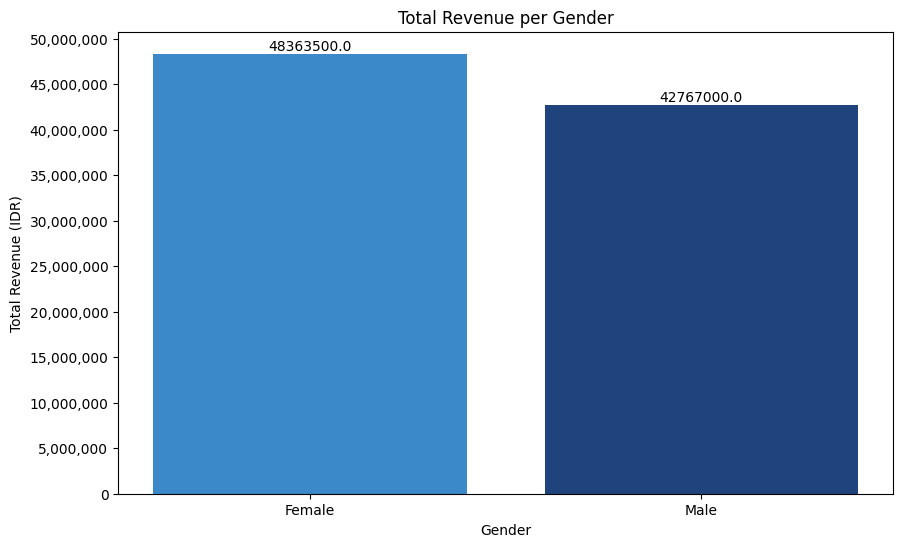

In [25]:
# Define colors for Male and Female
colors = {'M': '#1f437d', 'F': '#3b89c8'}

# Create Bar Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(RevenuePerGender.index, RevenuePerGender.values, color=[colors[gender] for gender in RevenuePerGender.index])
plt.yticks(np.arange(0,50000001,5000000))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xlabel('Gender')
plt.ylabel('Total Revenue (IDR)')
plt.title('Total Revenue per Gender')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

for bar in bars :
    yval = bar.get_height()
    plt.text(bar.get_x()+bar.get_width()/2,yval,round(yval, 2), ha = 'center', va = 'bottom')

In [26]:
# Inferential Statistics
# T-test for revenue by gender
payAmount_male = df[df['payCardSex'] == 'M']['payAmount']
payAmount_female = df[df['payCardSex'] == 'F']['payAmount']
t_stat, p_value = sc.ttest_ind(payAmount_male, payAmount_female)


print(f'H0 : Tidak adanya hubungan yang signifikan antara rata - rata pendapatan Transjakarta dengan Gender.\nH1 : Adanya hubungan yang signifikan antara rata - rata pendapatan Transjakarta dengan gender.')
print(f'\nT-test for Revenue by Gender: t-statistic = {t_stat:.2f}, p-value = {p_value:.4f}')
if p_value <= 0.05:
    print('Tolak H0. Ada hubungan yang signifikan antara rata - rata pendapatan Transjakarta dengan gender.')
else:
    print('Gagal tolak H0. Tidak ada hubungan yang signifikan atara rata - rata pendapatan Transjakarta dengan gender.')

H0 : Tidak adanya hubungan yang signifikan antara rata - rata pendapatan Transjakarta dengan Gender.
H1 : Adanya hubungan yang signifikan antara rata - rata pendapatan Transjakarta dengan gender.

T-test for Revenue by Gender: t-statistic = 0.67, p-value = 0.5058
Gagal tolak H0. Tidak ada hubungan yang signifikan atara rata - rata pendapatan Transjakarta dengan gender.


Gender wanita sedikit lebih banyak dalam berkontribusi pada pendapatan Transjakarta dari transaksi operasional busway. Sebanyak 53.07% pendapatan yang diterima Transjakarta dari operasional busway didapatkan dari gender wanita, sisanya 46.93% dari gender pria. Setelah dilakukan uji hipotesis menggunakan metode t-test independent sample, hasil menunjukkan rata - rata pendapatan yang diperoleh Transjakarta dari operasional busway tidak memiliki hubungan yang signifikan dengan vaiabel gender.

**RECOMMENDATION**\
Data ini dapat dimanfaatkan untuk mengetahui demografis para penumpang, Transjakarta dapat memilah - milah perusahaan mitra yang hendak melakukan sewa AdSpace(space iklan). Melihat dari persentase kontribusi pendapatan Transajakarta selama Bulan April, muncul pertanyaan, apakah selisih 6.14% cukup untuk memunculkan argumen agar Transjakarta lebih mengutamakan mitra yang bergerak hanya pada industri wanita? Apakah kontribusi 46.93% dari gender pria tidak perlu diperhitungkan?

Maka dari itu, dari data yang diperoleh, Transjakarta sebaiknya lebih mengutamakan mitra yang bergerak pada industri yang tidak terkait dengan gender (gender netural). Misalnya: E-commerce, Restaurant chain, atau fashion industry yang lebih gender neutral. 

## **Mengelompokkan Pendapatan Transjakarta Selama Bulan April 2023 Berdasarkan Gender** ##
Data ini akan digunakan untuk memprioritaskan perusahaan mitra yang ingin menggunakan AdSpace Transjakarta berdasarkan demografi kelompok usia.

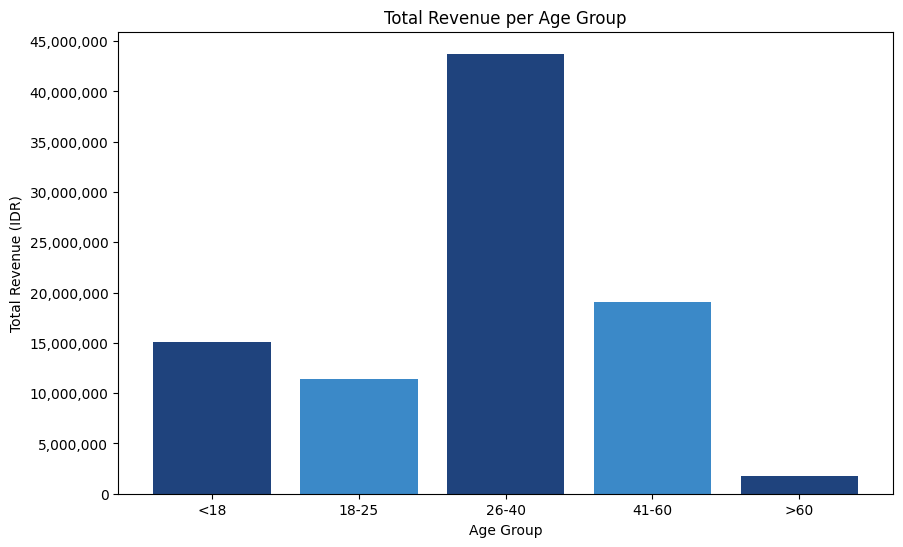

  AgeGroup   payAmount  percentage(%)
0      <18  15106000.0          16.58
1    18-25  11377500.0          12.48
2    26-40  43752000.0          48.01
3    41-60  19113000.0          20.97
4      >60   1782000.0           1.96


In [27]:
# Calculate total revenue per age group
revenue_per_age_group = df.groupby('AgeGroup')['payAmount'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(10, 6))
bars1 = plt.bar(revenue_per_age_group['AgeGroup'], revenue_per_age_group['payAmount'], color=['#1f437d','#3b89c8'])
plt.yticks(np.arange(0,45000001,5000000))
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in current_values])
plt.xlabel('Age Group')
plt.ylabel('Total Revenue (IDR)')
plt.title('Total Revenue per Age Group')
plt.show()

#Adding percentage column into the dataframe
revenue_per_age_group['percentage(%)'] = round(revenue_per_age_group['payAmount']/revenue_per_age_group['payAmount'].sum()*100,2)
print(revenue_per_age_group)

In [28]:
# Calculate total revenue and total transactions
total_revenue = df['payAmount'].sum()
total_transactions = df['transID'].count()

# Calculate CPM
CPM = (total_revenue / total_transactions) * 1000

print(f"Cost per Mille (CPM): IDR {round(CPM,2)}")

Cost per Mille (CPM): IDR 2707623.97


In [29]:
# ANOVA for revenue by age group
anova_result = sc.f_oneway(
    df[df['AgeGroup'] == '<18']['payAmount'],
    df[df['AgeGroup'] == '18-25']['payAmount'],
    df[df['AgeGroup'] == '26-40']['payAmount'],
    df[df['AgeGroup'] == '41-60']['payAmount'],
    df[df['AgeGroup'] == '>60']['payAmount']
)

print(f'H0 : Tidak adanya perbedaan antara rata - rata pendapatan Transjakarta dengan Kelompok usia.\nH1 : Adanya perbedaan antara rata - rata pendapatan Transjakarta dengan vaiabel usia.')
print(f'\nANOVA for Revenue by Age Group: F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue}')
if anova_result.pvalue <= 0.05:
    print('Tolak H0. Ada perbedaan antara rata - rata pendapatan Transjakarta dengan variable usia.')
else:
    print('Gagal tolak H0. Tidak ada perbedaan antara rata - rata pendapatan Transjakarta dengan variabel usia.')

H0 : Tidak adanya perbedaan antara rata - rata pendapatan Transjakarta dengan Kelompok usia.
H1 : Adanya perbedaan antara rata - rata pendapatan Transjakarta dengan vaiabel usia.

ANOVA for Revenue by Age Group: F-statistic = 89.75, p-value = 5.0713280119104835e-76
Tolak H0. Ada perbedaan antara rata - rata pendapatan Transjakarta dengan variable usia.


Kelompok Usia 26 tahun hingga 40 tahun menjadi populasi terbanyak yang berkontribusi terhadap pendapatan Transjakarta. Seperti yang sudah dijelaskan pada grafik sebelumnya, hal ini disebabkan karena usia 26 - 40 tahun merupakan usia produktif dimana mayoritas menggunakan moda transportasi ini untuk berangkat dan pulang kerja. Kelompok usia terbanyak kedua adalah penumpang dengan kelompok usia rentang 41 tahun hingga 60 tahun. 

Setelah dilakukan uji hipotesis menggunakan metode ANOVA, hasil p-value ditemukan jauh dibawah 0.05. Artinya, ada hubungan statistik yang sangat signifikan antara rata - rata pendapatan Transjakarta dengan kelompok usia.

**RECOMMENDATION**\
Dengan data ini, Transjakarta dapat lebih mengutamakan perusahaan mitra yang memiliki market segment dengan demografi usia produktif yaitu rentang 26 - 40 tahun untuk beriklan pada halte - halte atau bus Transjakarta. Sebagai contoh, Transjakarta dapat lebih mengutamakan perusahaan - perusahaan seperti developer rumah, brand mobil, brand sepeda motor, atau event - event besar seperti festival/konser.


count    33657.000000
mean         7.690258
std          7.853472
min          1.000000
25%          2.000000
50%          5.000000
75%         11.000000
max         64.000000
Name: distance, dtype: float64


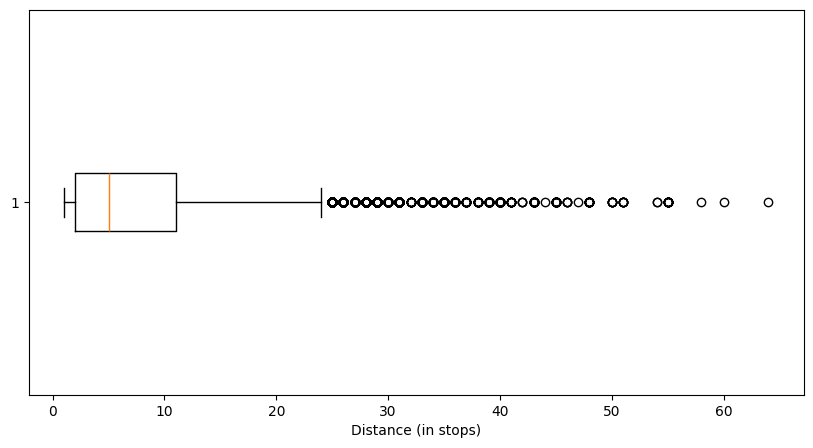

In [32]:
# Finding the distribution of distance traveled per passenger
plt.figure(figsize=(10,5))
plt.boxplot(df['distance'], vert=False)
plt.xlabel('Distance (in stops)')

print(df['distance'].describe())

Dari informasi diatas, boxplot tersebut memiliki IQR:
- Q1 = 2
- Q2 = 5
- Q3 = 11

Angka - angka tersebut menunjukkan 50% dari keseluruhan transaksi pada Bulan April 2023 memiliki jarak tempuh dari 2 stop hingga 11 stop.

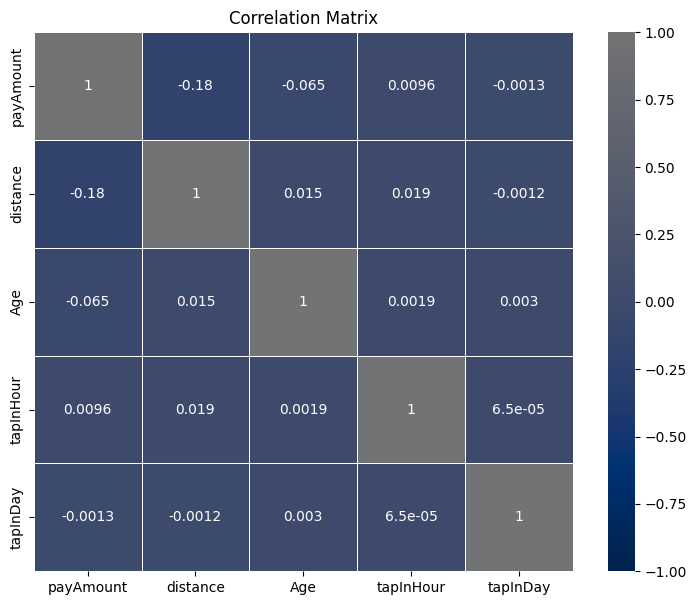

In [31]:
variables = ['payAmount', 'distance', 'Age', 'tapInHour', 'tapInDay']
correlation_matrix = df[variables].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', vmin=-1, vmax=1, center=1.2, square=True, linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

Tarif transjakarta flat pada angka Rp3,500 dan Rp20,000. Tidak adanya pengaruh antar variable jarak tempuh, usia, Jam tap in, atau tanggal tap in terhadap tarif transjakarta. Kesimpulan ini diambil karena value r antar variable tersebut dibawah 0.2 yang artinya tidak ada korelasi/sangat lemah.

**RECOMMENDATION**\
Transjakarta dapat menerapkan tarif berdasarkan jarak tempuh memanfaatkan data tap in dan tap out penumpang. Misalnya, Transjakarta dapat menetapkan tarif mulai dari harga Rp3500 dan naik Rp1000 per 5 km dihitung dari saat penumpang melakukan tap in. 

Contohnya, penumpang menggunakan moda transportasi Transjakarta dan membutuhkan untuk menempuh 6.5 km untuk sampai ke tujuan, maka penumpang akan dikenakan tarif Rp4500, apabila penumpang menempuh jarak 12 km, penumpang akan dikenakan tarif Rp5500 dan seterusnya.